In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ccdata/CC GENERAL.csv


<style>
  @import url('https://fonts.googleapis.com/css2?family=Lucida+Handwriting&display=swap');
</style>
</head>
<body style="font-family: 'Arial', sans-serif; background-color:#978FA8; margin: 0; padding: 0; display: flex; justify-content: center; align-items: center; min-height: 100vh;">
  <h1 style="font-size: 3rem; color: #05386B; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #BC986A; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    CASE STUDY : MARKETING DEPARTMENT SEGMENTATION
  </h1>

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    This dataset belongs to a financial intituition and contains an extensive data on their customers based on their purchasing patterns over past few years .
    The institution wants to launch a targeted campaign based on the way their customers are divided .
    We need to find that 'criteria' for division
     </p>


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"><b>
    <b><i><u>DETAILS OF DATASET</u></i></b><br><br>
    1) CUSTID : Identification number of credit card holder<br><br>
2) BALANCE : Balancing amount left in customer's account<br><br>
3) BALANCE_FREQUENCY : Frequency of updating balance in account . Score in between 0 and 1 . (0 : not updated frequently and 1 : updated frequently)<br><br>
4) PURCHASES : Amount of purchases made<br><br>
5) ONEOFFPURCHASES : Maximum purchases in one go<br><br>
6) INSTALLMENTS_PURCHASES : Amount of purchase done in one installments<br><br>
7) CASH_ADVANCE : Cash payments made in advance by the customer<br><br>
8) PURCHASES_FREQUENCY : Frequency of making purchases .(0 : no purchases and 1 : maximum purchases)<br><br>
9) ONEOFF_PURCHASES_FREQUENCY : Tells how frequently the purchases are made in one go . (0 : no purchases in one go and 1 : maximum purchases in one go)<br><br>
10) PURCHASES_INSTALLMENTS_FREQUENCY : frequency of making purchases with installments<br><br>
11) CASH_ADVANCE_FREQUENCY : frequency of making cash payments in advance<br><br>
12) CASH_ADVANCE_TRX : number of transactions made with providing cash in advanced<br><br>
13) PURCHASES_TRX : number of purchases made in transactions<br><br>
14) CREDIT_LIMIT : limit of the credit card user<br><br>
15) PAYMENTS : amount of payment made by user<br><br>
16) MINIMUM_PAYMENTS : least amount of payment made by the user<br><br>
17) PRC_FULL_PAYMENT : Percentage of credit card payments made by the use in full amount <br><br>
18) TENURE : time period for user's credit card service<br><br>
    </b></p>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"><b>
    <b><i><u>CONCLUSIONS FROM THE DATASET DESCRIPTION</u></i></b><br><br>
    1) Mean balance is 1564(approx) 💰 <br><br>
    2) On average, a user's bank account gets updated at a frequency of 0.9. This is good news!! It means that people are using their 💳 credit cards and bank accounts quite often! <br><br>
    3) An average purchase is of 1000 💸 <br><br>
    4) Average purchase done in one go (one-off purchase) amount is 600 💳 <br><br>
    5) Frequency of making a purchase on average is approximately 0.5 ⌛ <br><br>
    6) Frequency of making a purchase on average is approximately 0.5 ⌛ <br><br>
    7) Approximately 15% of the people prefer making full payments 💳 <br><br>
    8) Average tenure is 11 years 📅 <br><br>
    9) Maximum one-off purchase of 40761. This is a huge amount and this customer is important 💰🔝 <br><br>
    10) Maximum payment as cash advance is the cash advance of 47137. This customer's details are also important 💸💼
</b>
    </p>

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df[df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    🌟 This customer has made the highest purchase in one go, making it crucial to inspect all details thoroughly.<br><br>
🚫 It's evident that the customer doesn't prefer paying in cash advances. Notably, the account balance is significantly higher than the average balance amount.<br><br>
💳 Remarkably, the customer makes 25% of transactions in full payment mode.<br><br>
🌐 **CONCLUSION:** 🚀 **THIS CUSTOMER CONTRIBUTES A LOT TO OUR BUSINESS AND IS VITAL FOR OUR ORGANIZATION!** 🌟

 </p>

In [8]:
df[df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    💸 This customer predominantly opts for cash advances, displaying a frequency close to 100%. 💯<br><br>
🚫 Remarkably, this individual has never made any payments in full. 💳<br><br>
🌟 With a balance frequency of 1, equivalent to 100%, it's clear that this customer is an active user! 🔄
    </p>

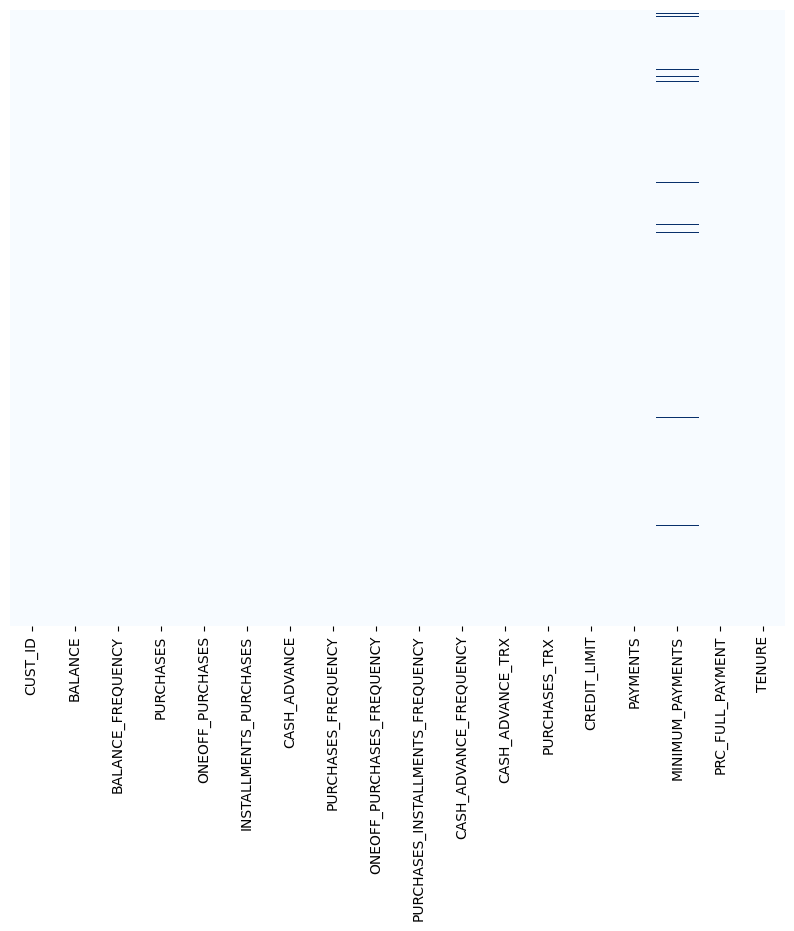

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues', cbar=False)
plt.show()

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: ; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    🕵️‍♀️ We've detected some missing values in the column<br>MINIMUM_PAYMENTS. 📊 It's crucial to investigate further because even a single missing data point can be significant. 🧐</p>

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    🚨 We've identified 313 missing values in the column MINIMUM_PAYMENTS and 1 missing value for CREDIT_LIMIT.<br> 📉 To handle this, we'll be replacing these values with the mean values, as it aligns with logical data imputation practices. 🔄
</p>

In [11]:
df.loc[df['MINIMUM_PAYMENTS'].isnull()==True, 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [12]:
df.loc[df['CREDIT_LIMIT'].isnull()==True , 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop('CUST_ID',axis = 1 , inplace = True)

In [16]:
n = len(df.columns)
print(n)

17


In [17]:
import warnings
warnings.filterwarnings("default")

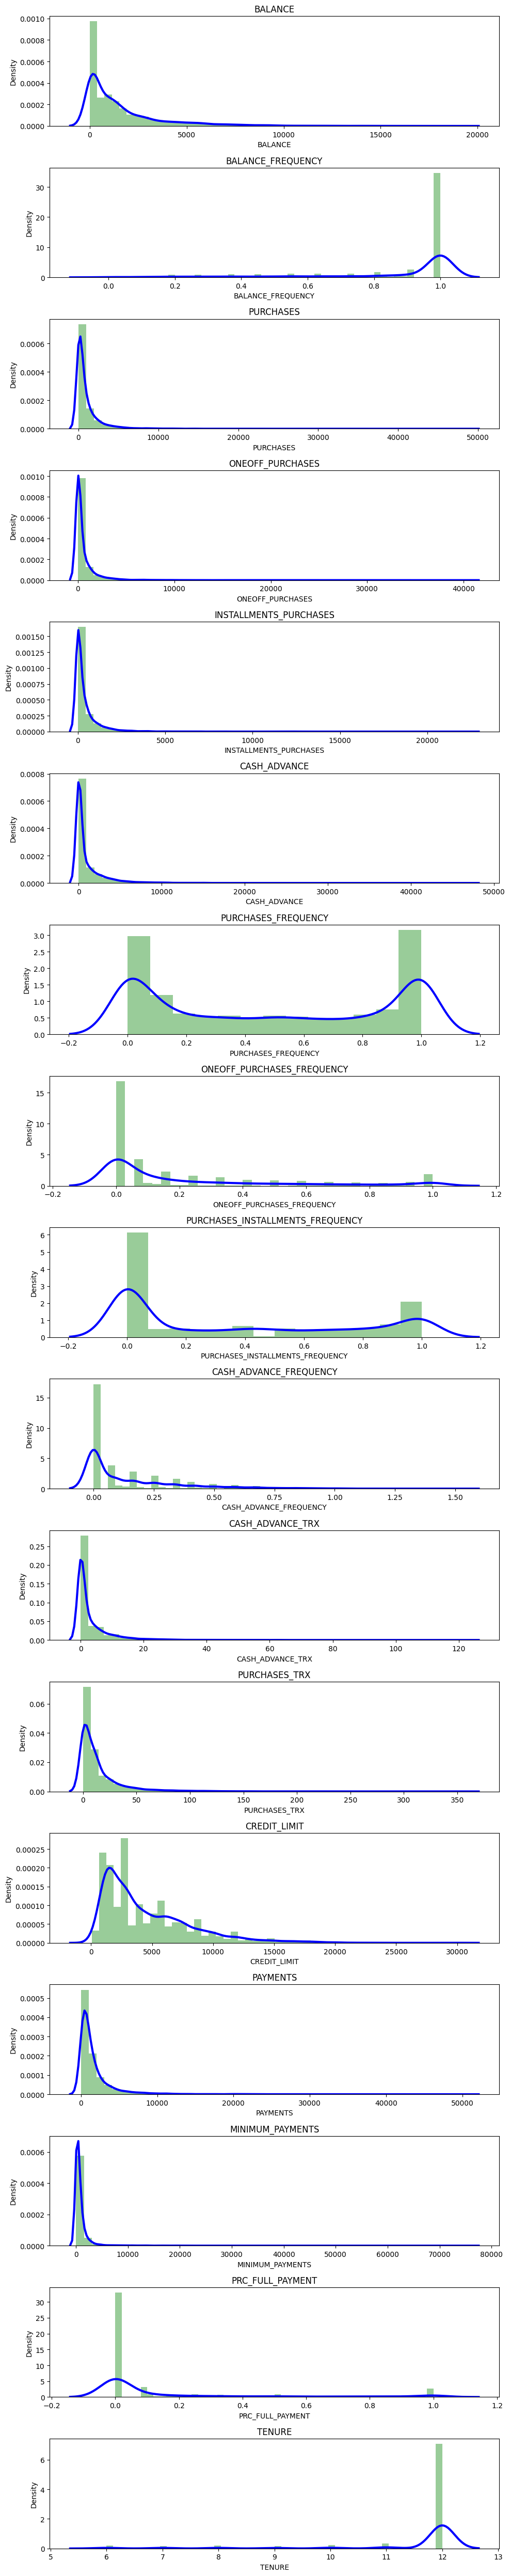

In [18]:
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(10, 50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    1) 📊 From the first plot, it's evident that the majority of the density is clustered around 1500, indicating this as the mean balance. This is fantastic news! 💰<br><br>
2) 📈 In the second block, we observe that people actively use their bank accounts.<br><br>
3) 📉 Almost all the plots show consistency with our dataset description, as found earlier.<br><br>
4) 📊 According to the PURCHASES_FREQUENCY distplot, we can broadly classify our customers into two clusters. Some use credit card purchases frequently, while others don't.<br><br>
5) 💸 Cash advance usage is not a common practice. This indicates that our customers are well aware of the credit penalties on payment delays.<br><br>
6) 🚫 Unfortunately, very few people pay the credit card amount in full. This is concerning news!<br><br>
7) ⏳ The customers are very loyal, as most of them have a longer tenure.<br><br>


In [19]:
corr_mat = df.corr()

<Axes: >

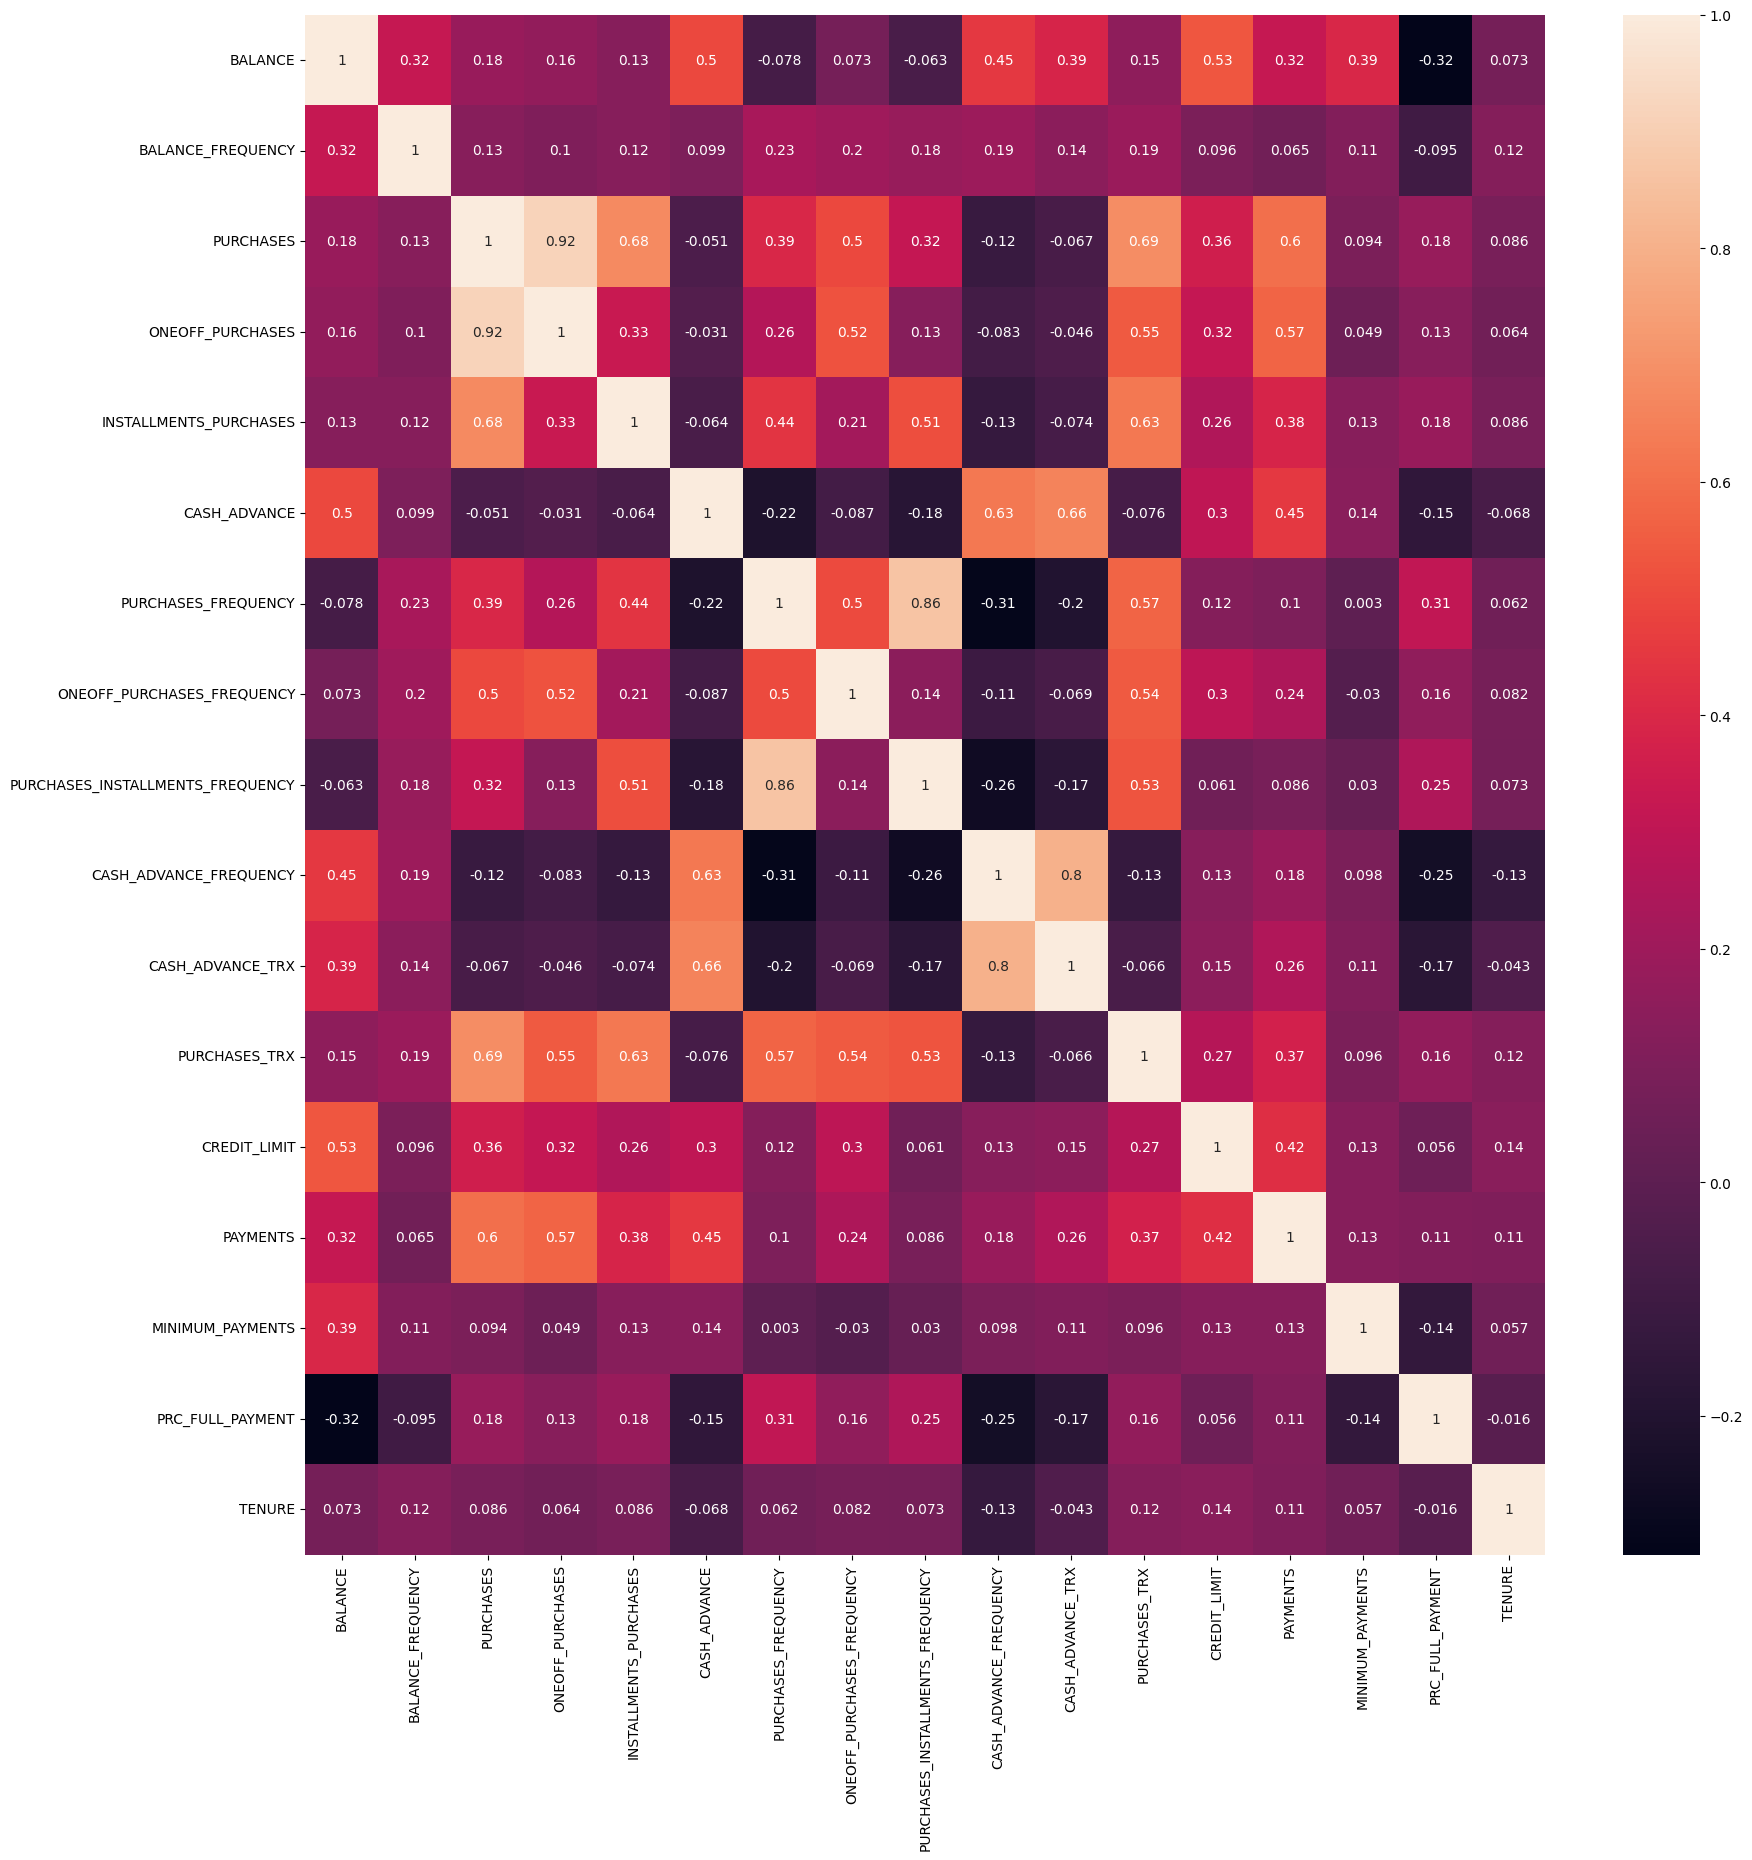

In [20]:
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_mat , annot = True)

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
In order to analyze the correlation between the attributes, I have built a heatmap. It is pretty evident from the scale that the lighter the color, the higher the correlation.<br>
   From this heatmap, we can make the following conclusions:<br>
    1) Clients that prefer purchasing in one go make higher purchases 🛒💸<br>
    2) Clients that prefer purchasing in installments tend to purchase more frequently 🔄💳<br>
    3) Higher frequency of paying in cash advances also increases the cash advance transactions 💸⬆️
 </p>

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> Standard scaler has been used to transform all the datapoints, bringing them between 0 and 1 📏. This is done to ensure that the machine learning models (implemented further) do not give higher weightage to any attributes due to datapoints of large sizes ⚖️.
    </p>

In [22]:
df_scaled.shape

(8950, 17)

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
   🔍  🚀 The K-means algorithm, a maestro of clustering, choreographs our dataset into clusters that harmonize in similarity. Each cluster shares a rhythm of distinct purchasing characteristics. 🕺 <br>A centroid , orchestrates the belongingness of each datapoint to its corresponding cluster. 🎶✨
<br><br>
Choosing K-means is a smart option because we aim to uncover the common threads in purchase patterns woven by our unique customers. 🕵️‍♂️🧩
<br>
    </p>

Text(0, 0.5, 'Sources WCSS')

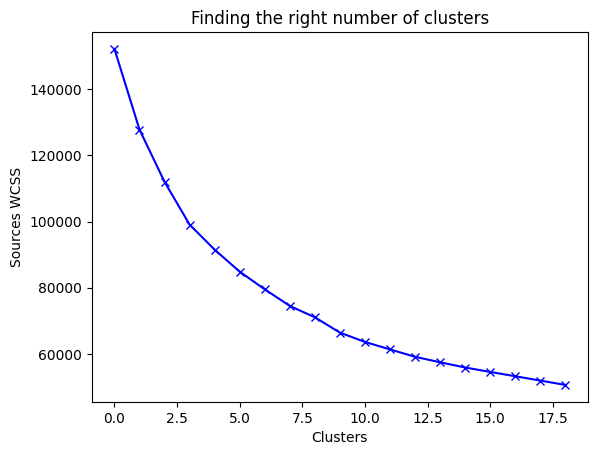

In [23]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

score_1 = []
range_values = range(1,20)

for i in range_values : 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)
plt.plot(score_1 , 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Sources WCSS')


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
The Elbow method helps us identify the optimal number of clusters for the K-means algorithm. 📊 By analyzing the Within-Cluster Sum of Squares (WCSS) against the cluster number, we aim to minimize WCSS. While the graph may appear smooth, upon closer inspection, a subtle bump at the 8th cluster is observed. Hence, we choose 8 clusters for our analysis. 🕵️‍♂️💡
    </p>

In [24]:
kmeans = KMeans(8)# took clusters as 8
kmeans.fit(df_scaled) # fit the model
labels = kmeans.labels_
kmeans.cluster_centers_.shape 

(8, 17)

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">  
    By leveraging the power of K-means clustering, our data, originally spread across 17 attributes, is now harmoniously grouped into 8 distinct clusters. Each row in the resultant (clusters_centers) represents the centroid of one of these clusters, shedding light on the unique characteristics of each group. Lets explore the patterns and gain insights! 🚀
</p>

In [25]:
clusters_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
    🔍 Transforming our series into a dataframe is for unraveling the secrets hidden within each attribute. The clusters_centers dataframe emerges as a distilled essence, providing a concise summary of the organization's original dataset. 📈
    </p>

In [26]:
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.725404,0.312740,-0.355389,-0.254141,-0.373492,0.848764,-0.798467,-0.384129,-0.692143,1.444217,0.982524,-0.454883,0.225334,0.022025,0.151659,-0.424162,-0.409355
1,-0.123576,0.380192,-0.340004,-0.225527,-0.389472,-0.239440,-0.792488,-0.357127,-0.723359,-0.150650,-0.207580,-0.465699,-0.394637,-0.299945,-0.056385,-0.452119,0.141997
2,1.033400,0.467967,2.490089,1.831388,2.523294,-0.171652,1.161262,1.566958,1.263113,-0.293252,-0.176771,3.134672,1.279829,1.389329,0.558388,0.253897,0.337394
3,-0.389190,0.309105,-0.053770,-0.256926,0.344840,-0.362148,1.014598,-0.412609,1.213977,-0.471383,-0.363296,0.156080,-0.315816,-0.238067,-0.045725,0.384859,-0.030801
4,-0.698837,-2.154344,-0.318391,-0.237417,-0.316549,-0.313485,-0.562621,-0.436296,-0.456376,-0.489608,-0.369101,-0.427365,-0.213975,-0.226956,-0.254935,0.256231,-0.157814
5,-0.109448,0.396260,0.542141,0.662810,0.063988,-0.320918,0.987804,1.868307,0.214365,-0.404291,-0.327152,0.627120,0.456215,0.142839,-0.154276,0.428636,0.216217
6,2.259409,0.404281,-0.095576,-0.074722,-0.088797,3.058137,-0.228211,-0.075030,-0.172575,2.174040,2.660347,-0.102136,1.497853,1.653312,0.889804,-0.344579,0.092951
7,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
   ⚖️ While this is a condensed overview, it's not easy to interpret since the values underwent scaling earlier. To decode the real meaning, the inverse transform swoops in, gracefully restoring the data to its original, familiar scale. 🔄📊
    </p>

In [27]:
clusters_centers = scaler.inverse_transform(clusters_centers)
clusters_centers = pd.DataFrame(data = clusters_centers , columns = df.columns )
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3074.342796,0.951356,243.911204,170.616059,73.323768,2758.768719,0.169887,0.087865,0.089362,0.424147,9.953833,3.403133,5314.307127,1796.903378,1217.641641,0.029655,10.969497
1,1307.261219,0.967335,276.780290,218.109465,58.872816,476.754403,0.172287,0.095920,0.076956,0.104998,1.832245,3.134286,3058.598639,864.832560,732.803122,0.021478,11.707347
2,3715.410675,0.988128,6323.317337,3632.165581,2692.851473,618.908474,0.956421,0.669912,0.866431,0.076461,2.042493,92.626062,9150.991501,5755.114893,2165.505880,0.227975,11.968839
3,754.407895,0.950495,888.324904,165.993007,722.902299,219.430672,0.897558,0.079369,0.846903,0.040816,0.769598,18.589388,3345.381637,1043.964592,757.646696,0.266279,11.476099
4,109.904118,0.366927,322.957708,198.374317,124.816358,321.477421,0.264543,0.072302,0.183062,0.037169,0.729984,4.087127,3715.921424,1076.129845,270.090300,0.228658,11.306122
5,1336.668023,0.971141,2161.498486,1692.566997,468.931488,305.890698,0.886804,0.759810,0.449632,0.054241,1.016253,30.297690,6154.344817,2146.649305,504.672547,0.279083,11.806672
6,6267.243873,0.973041,799.005241,468.414465,330.769786,7391.926508,0.398759,0.180075,0.295852,0.570192,21.403743,12.171123,9944.251337,6519.320521,2937.856257,0.052931,11.641711
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


In [28]:
labels.shape

(8950,)

In [29]:
labels.max()

7

In [30]:
labels.min()

0

In [31]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([6, 5, 1, ..., 0, 6, 1], dtype=int32)

In [32]:
df_cluster = pd.concat([df , pd.DataFrame({'cluster' : labels})] , axis = 1)

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
    🌟 The kmeans, looks at our scaled dataset (df_scaled) and groups similar things together into clusters. 🤝 At the same time, it gives each thing a special label (y_kmeans) to show which cluster it belongs to. It's like sorting our data into different groups, each with its respective cluster.
    </p>
    

In [33]:
df_cluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,3
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,3
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,4


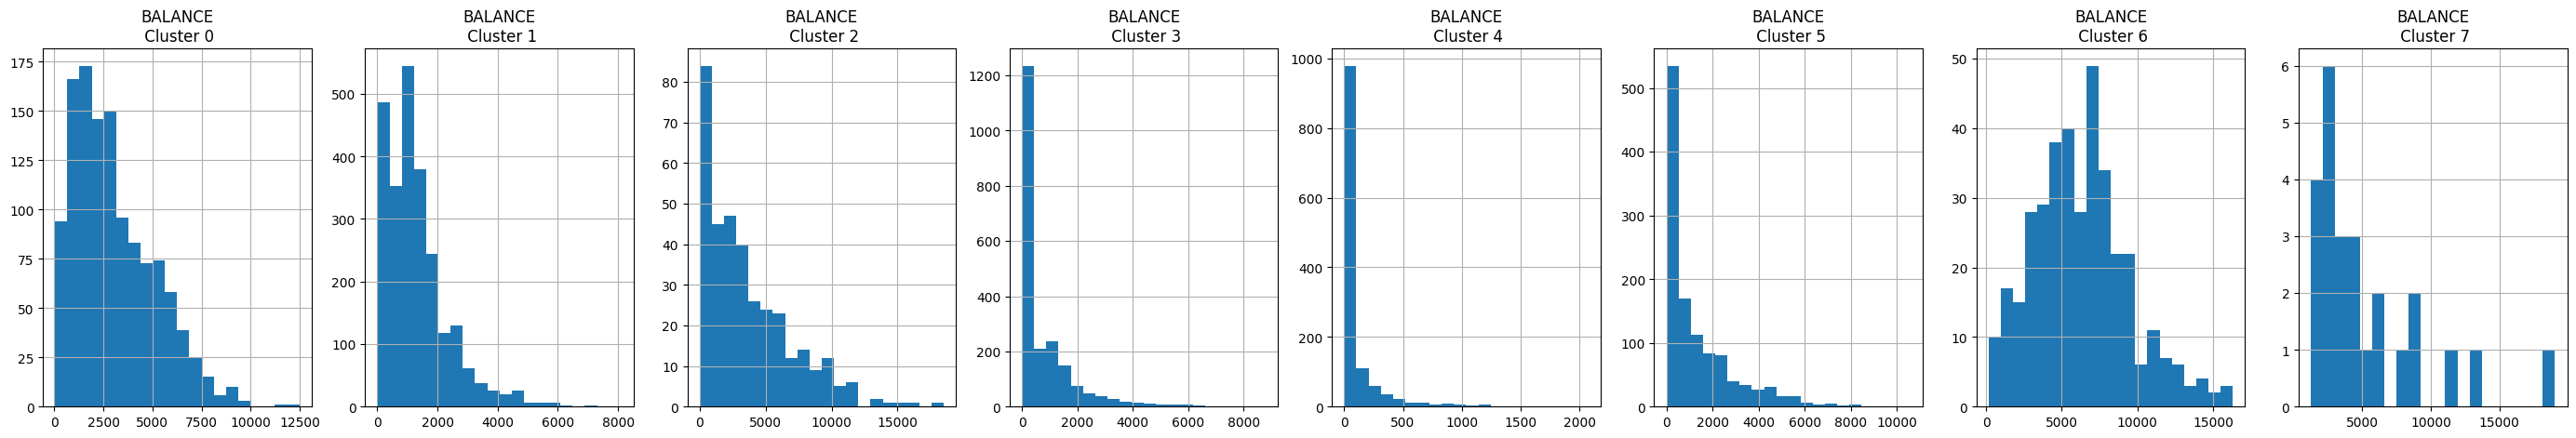

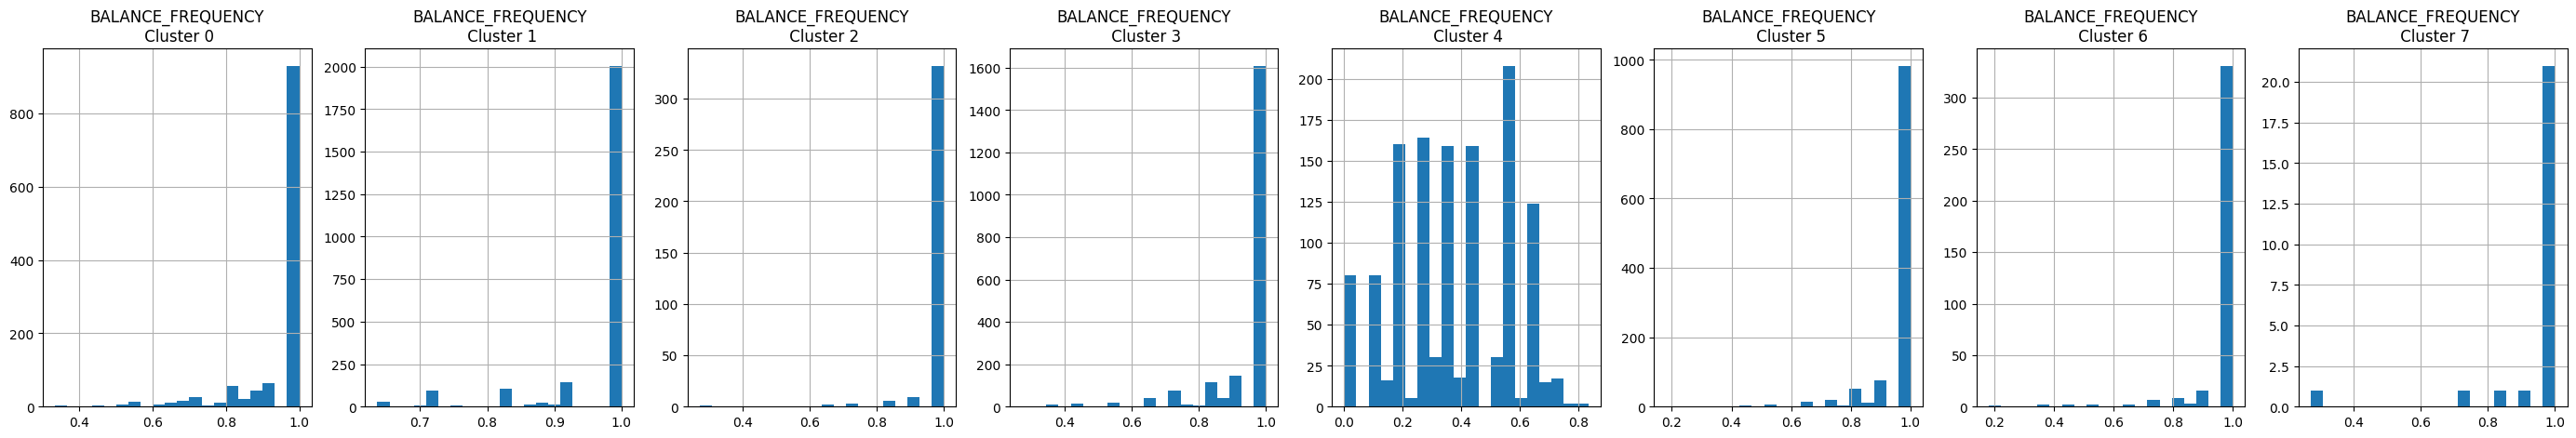

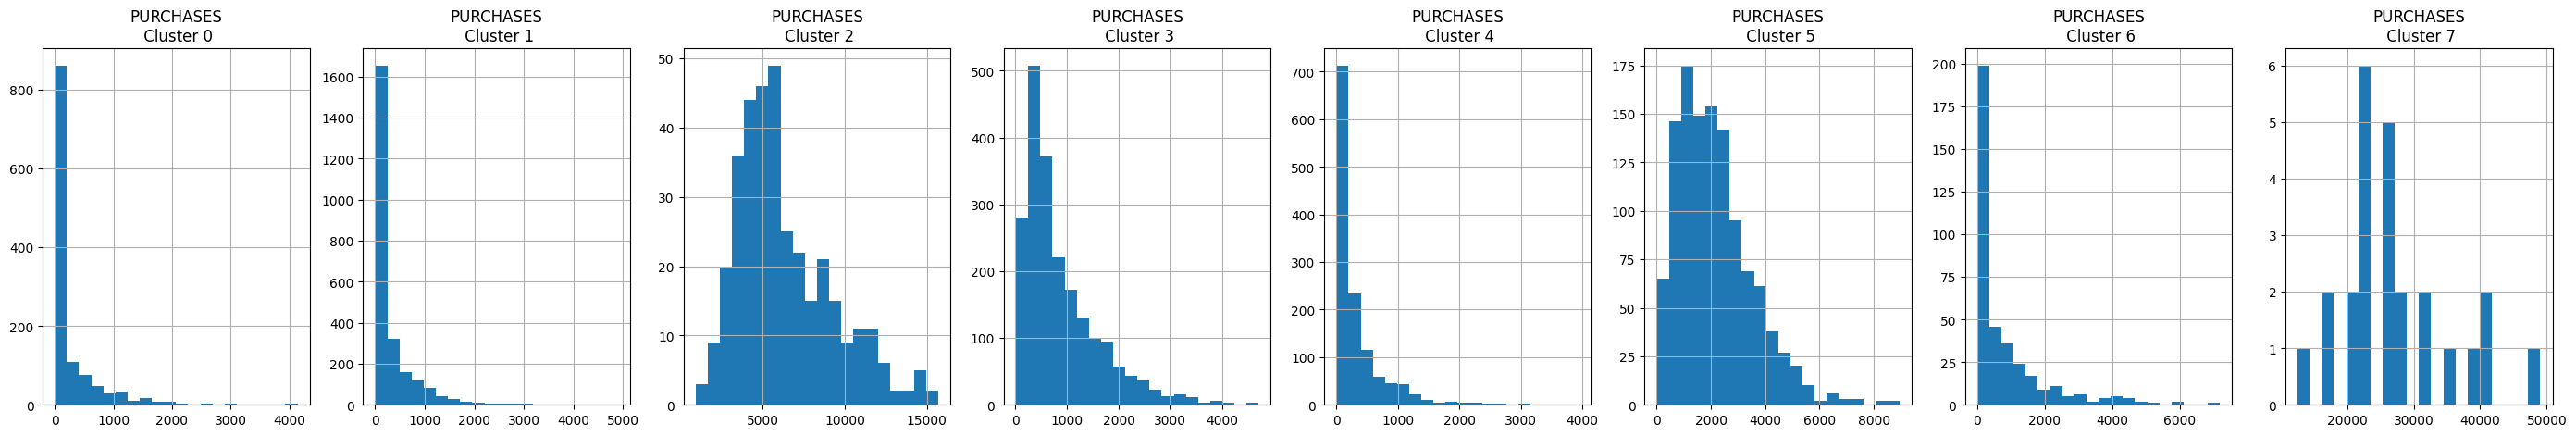

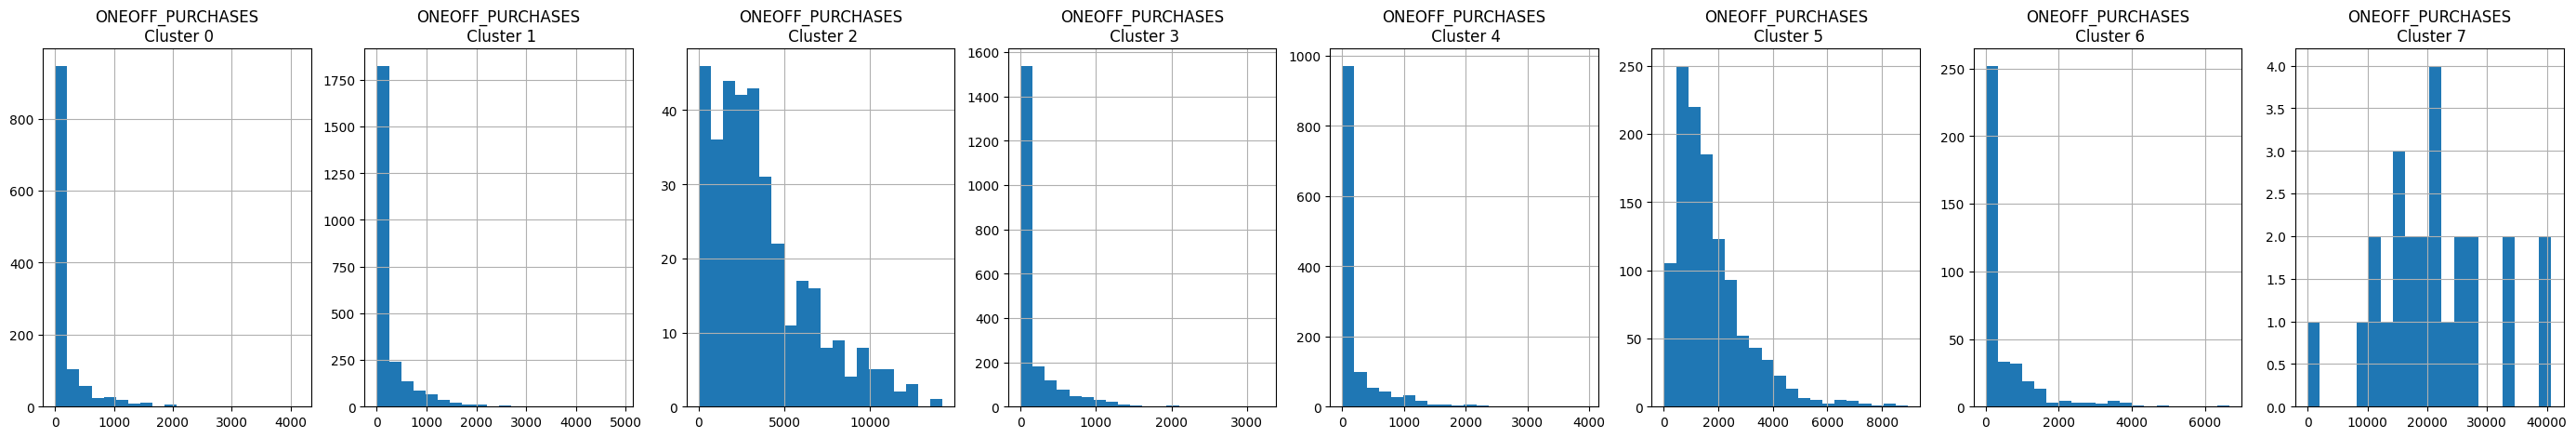

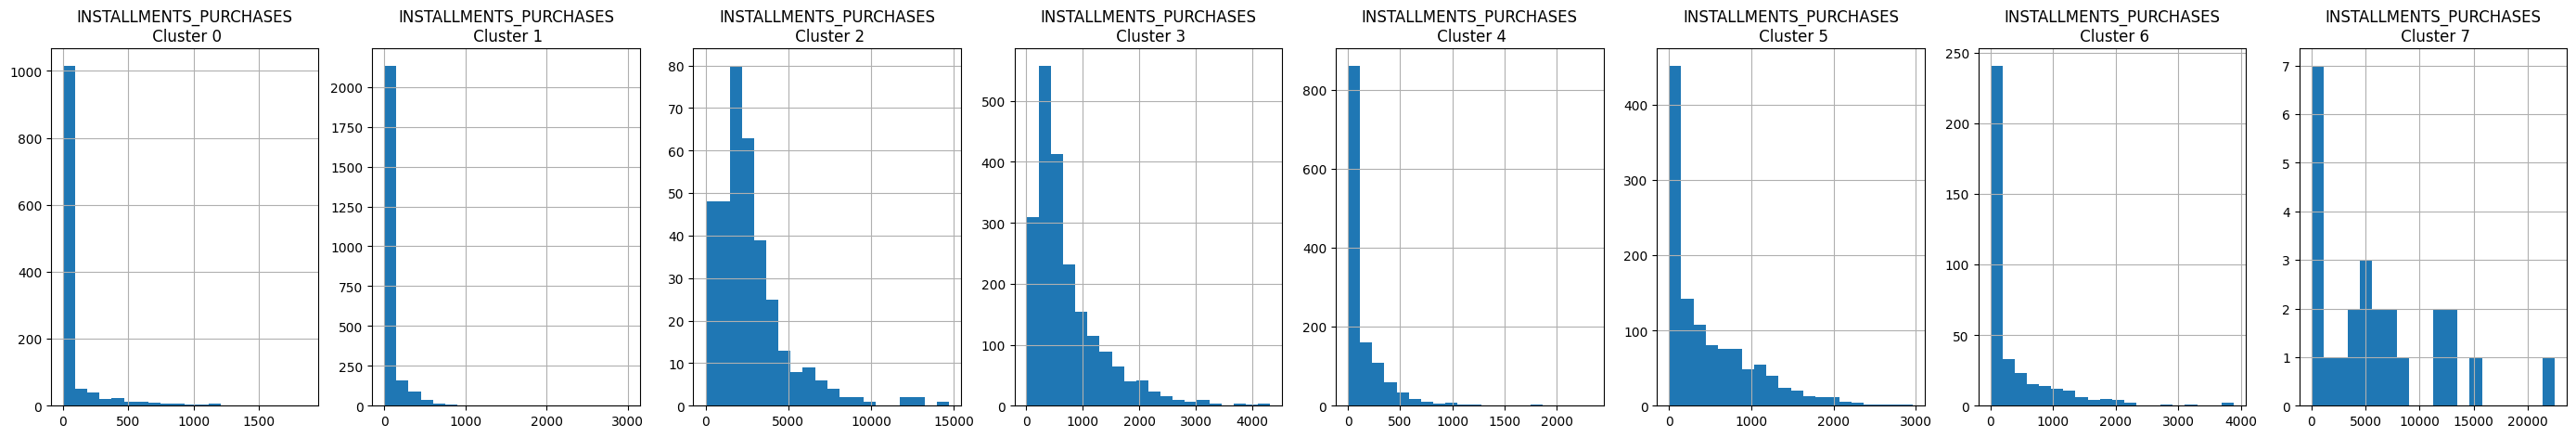

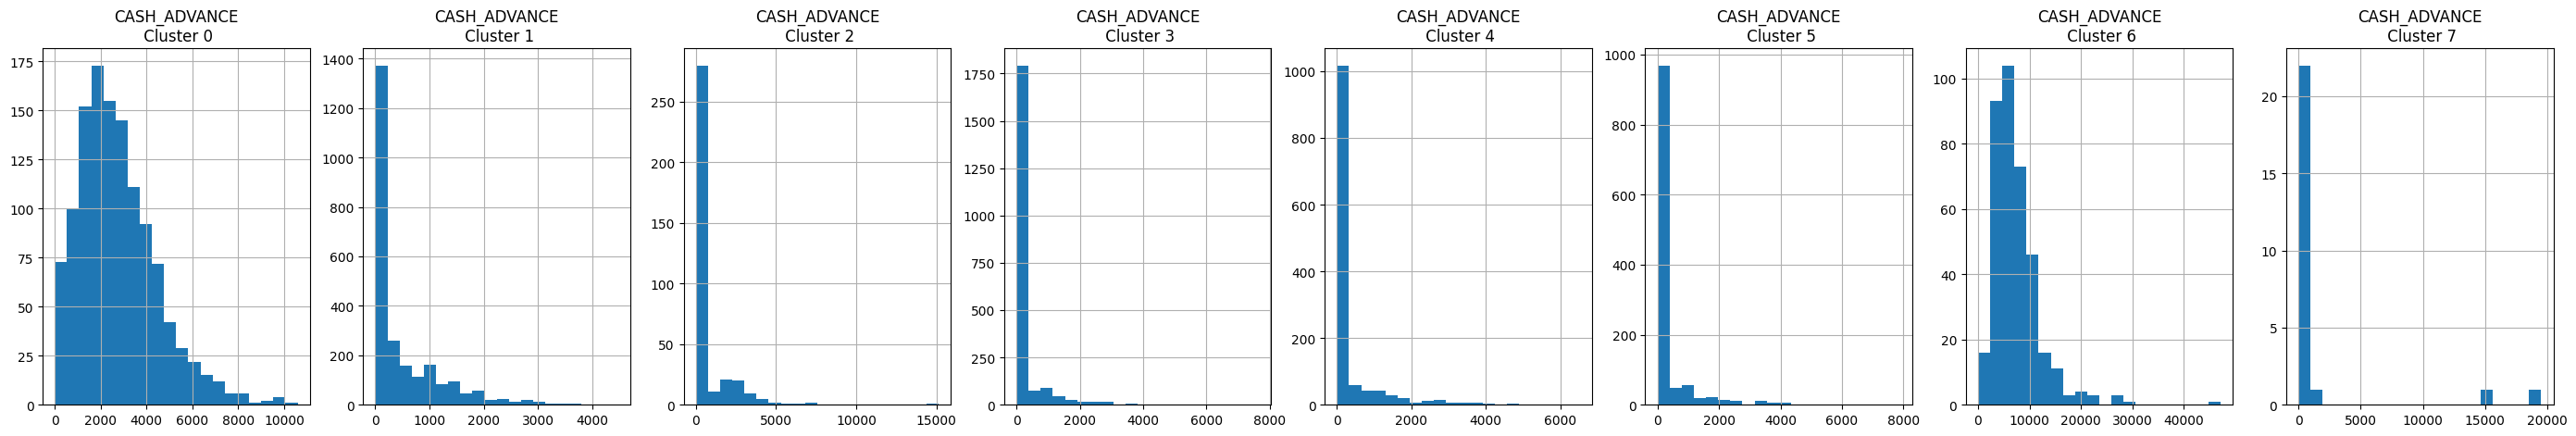

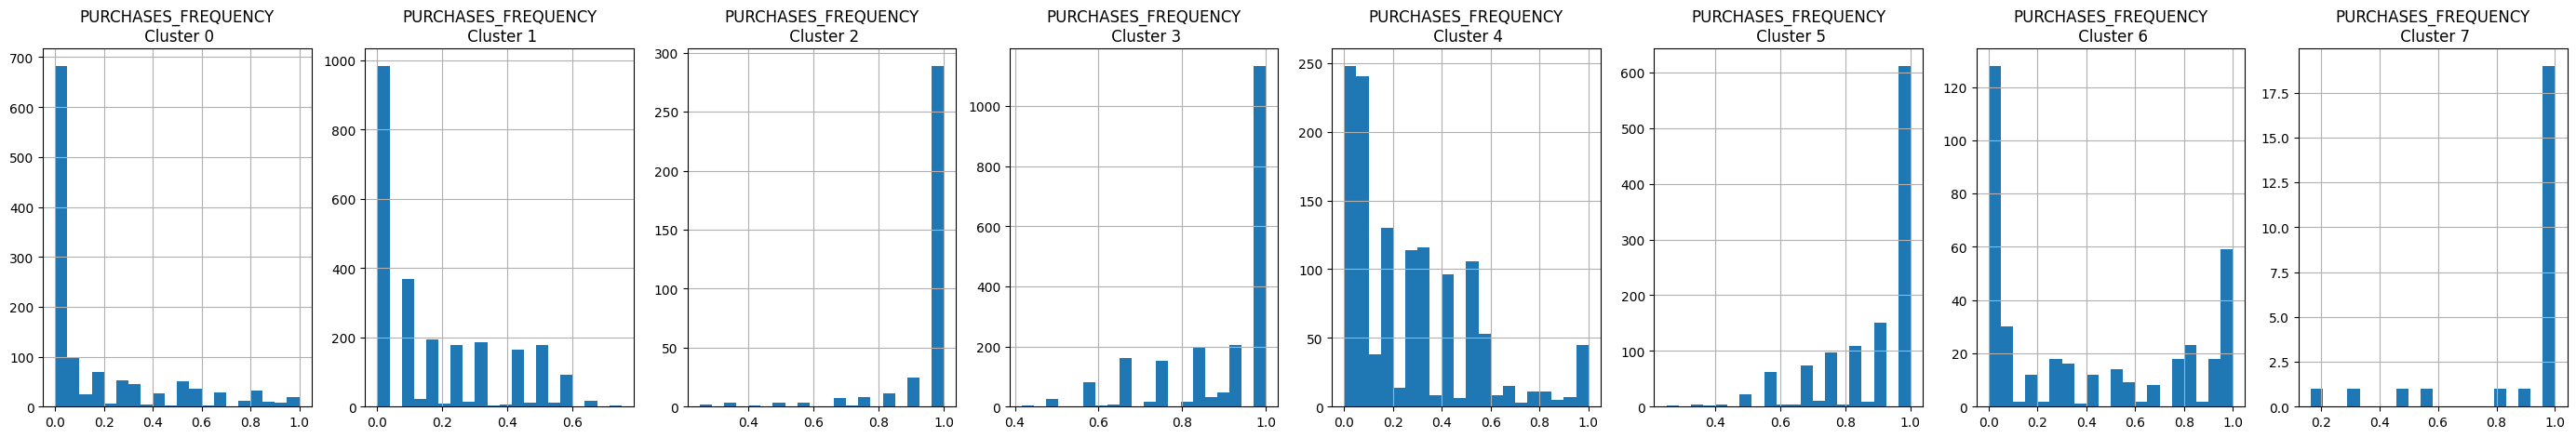

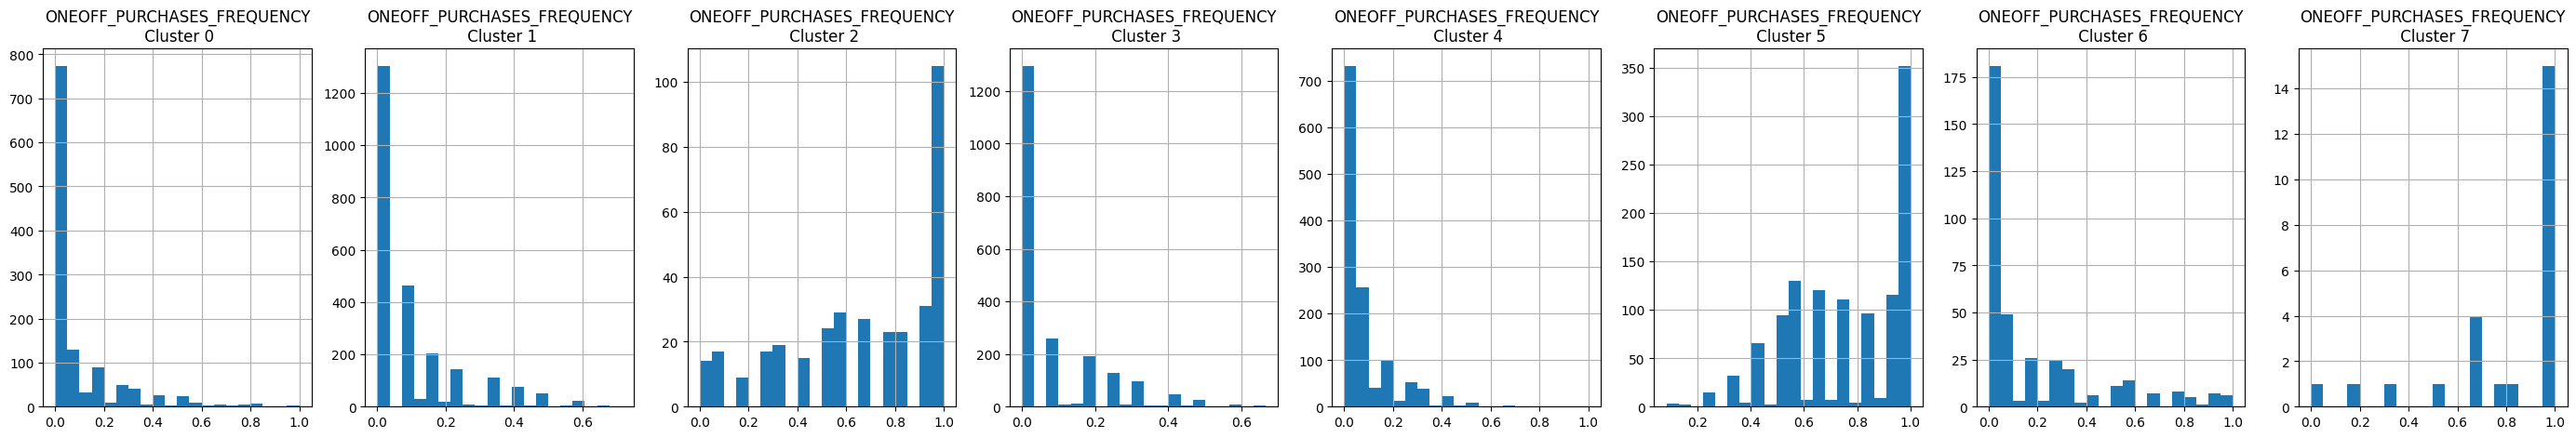

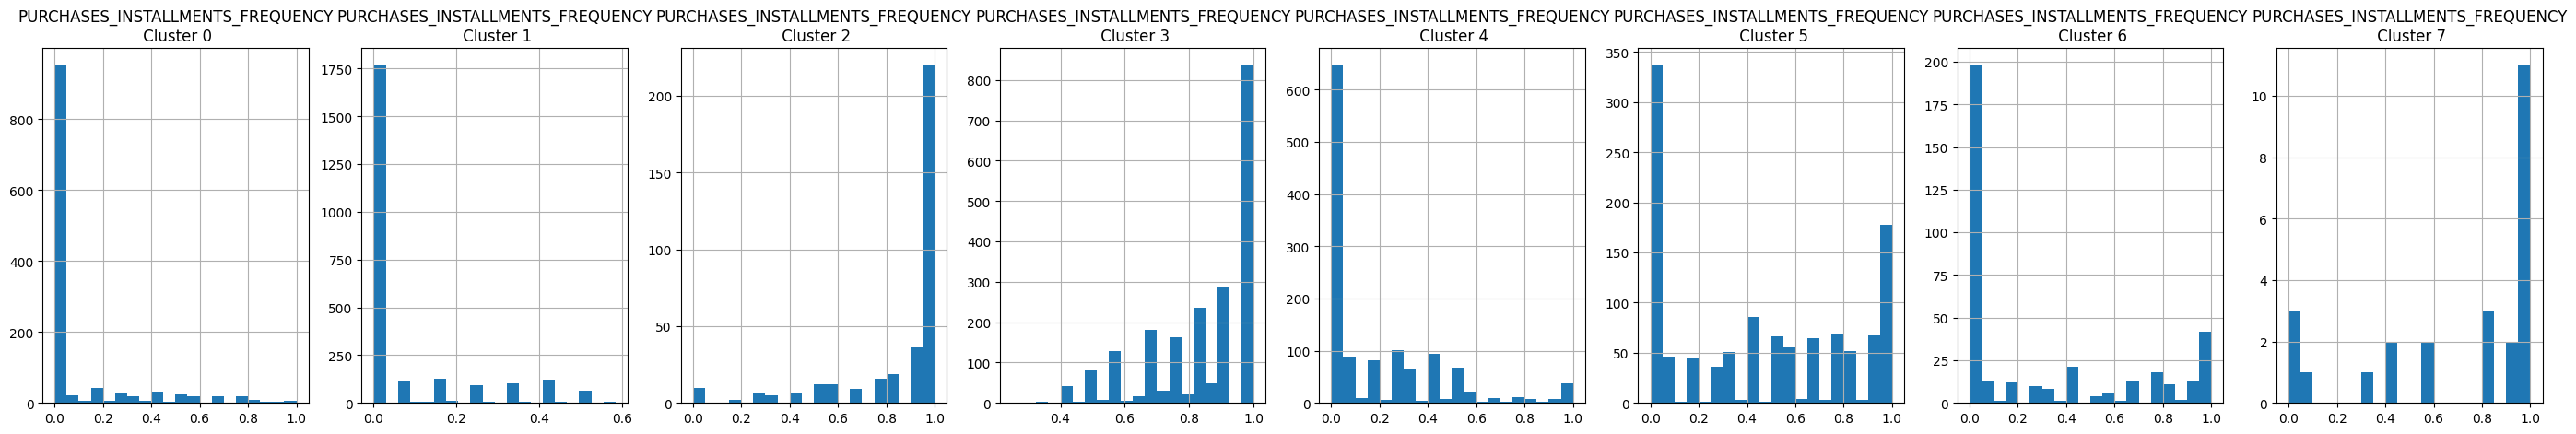

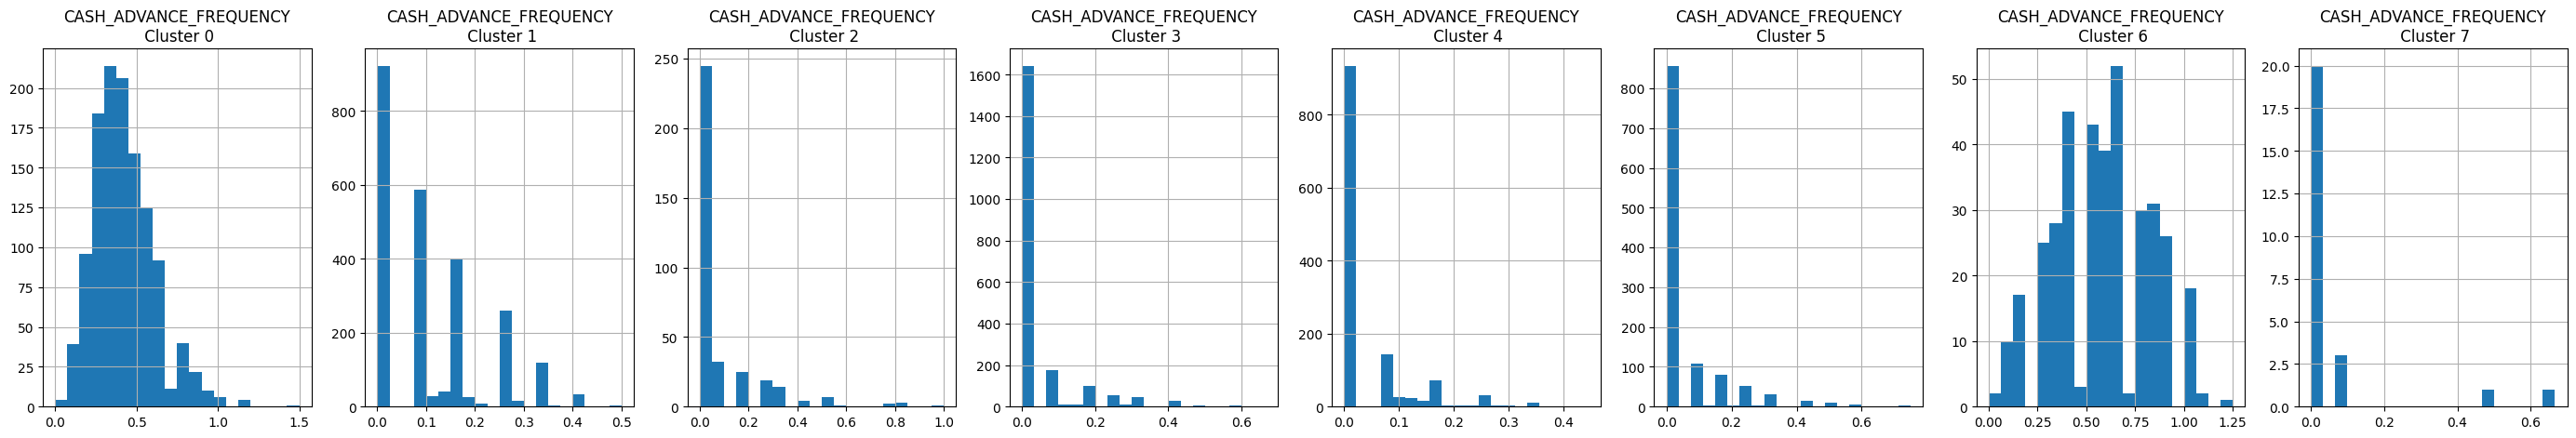

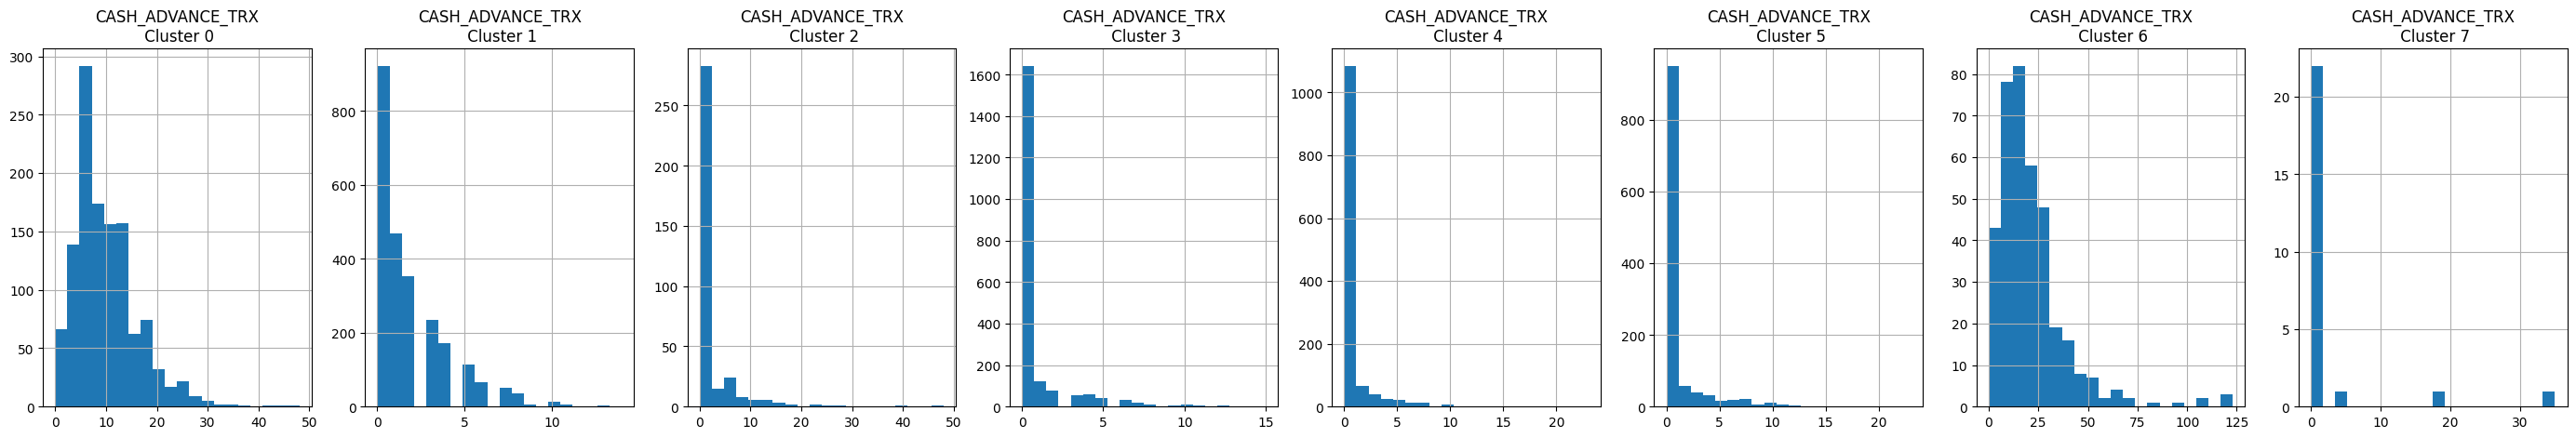

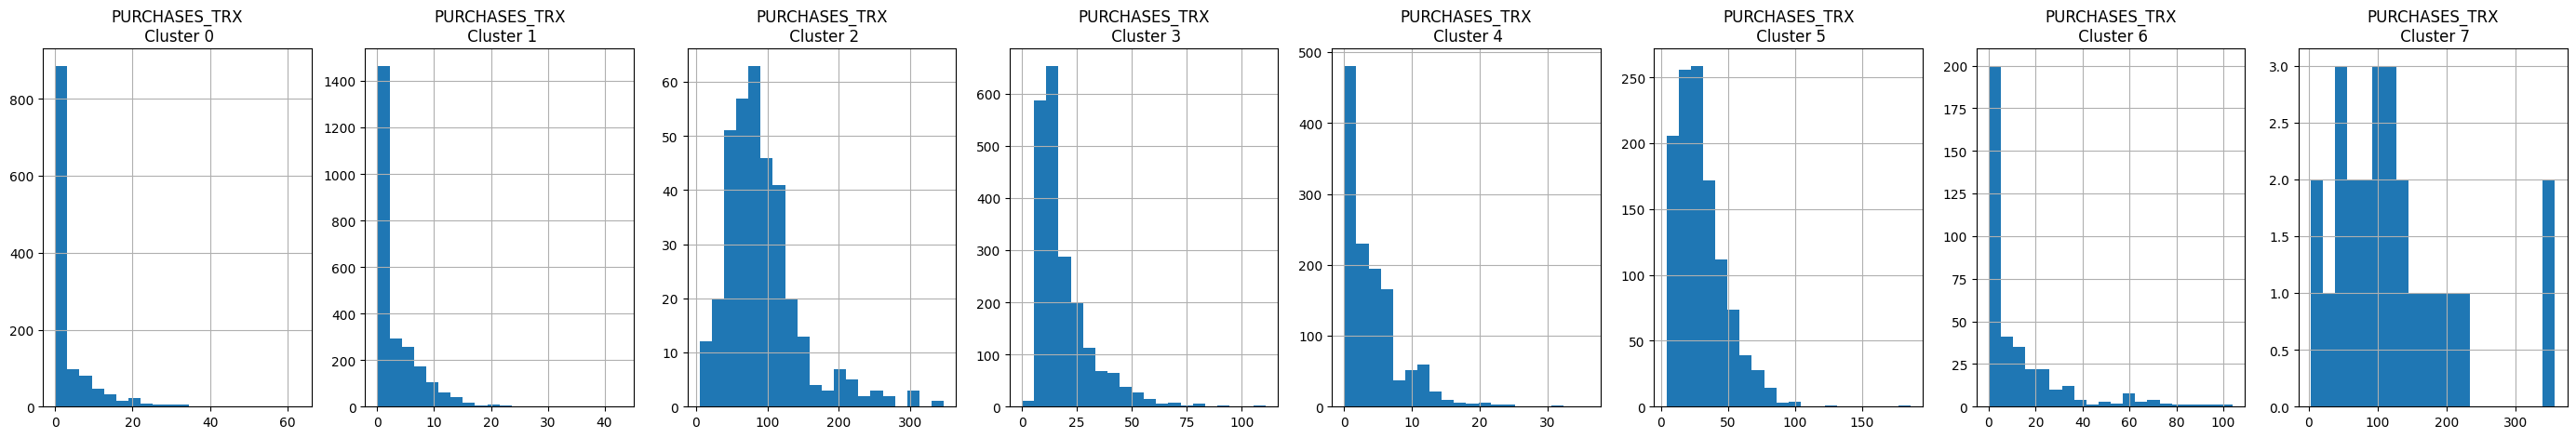

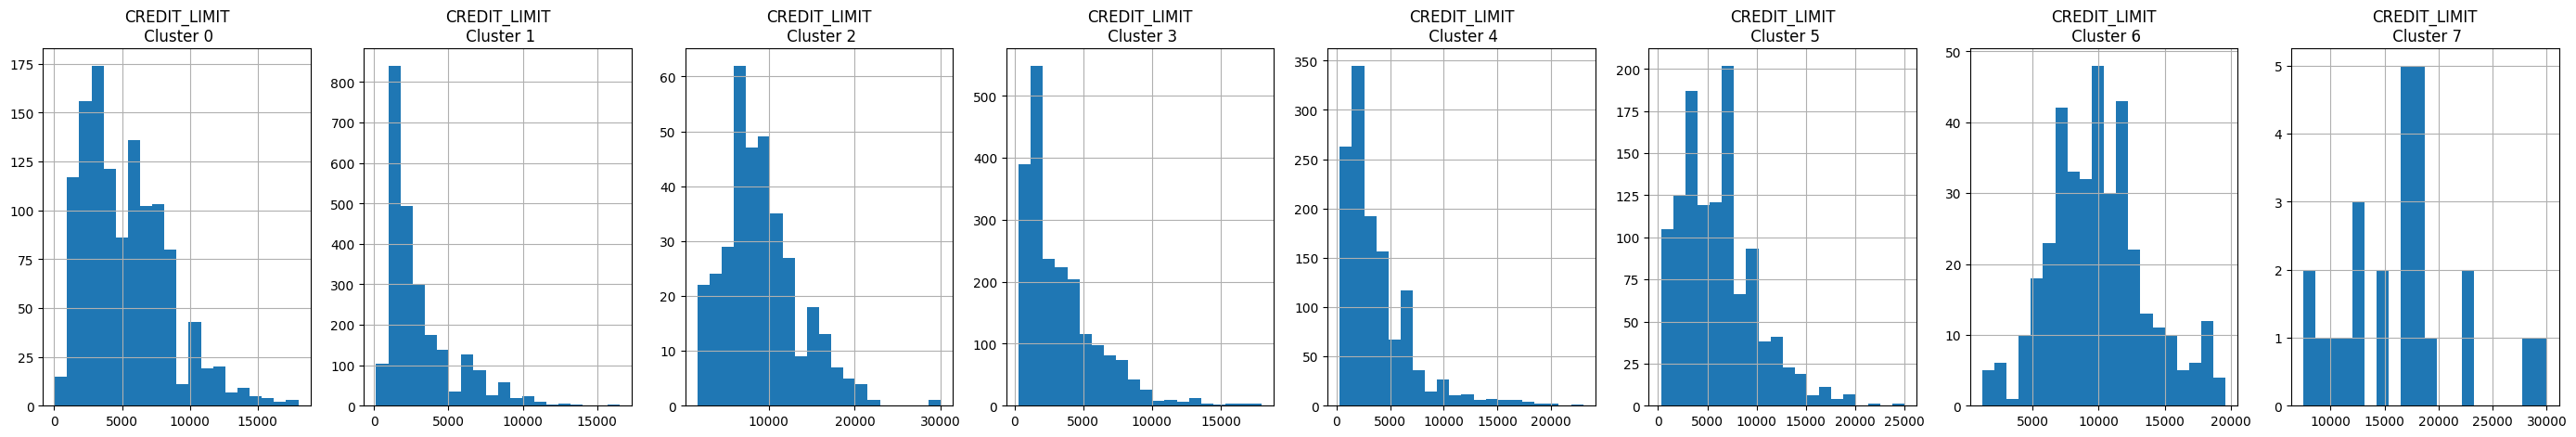

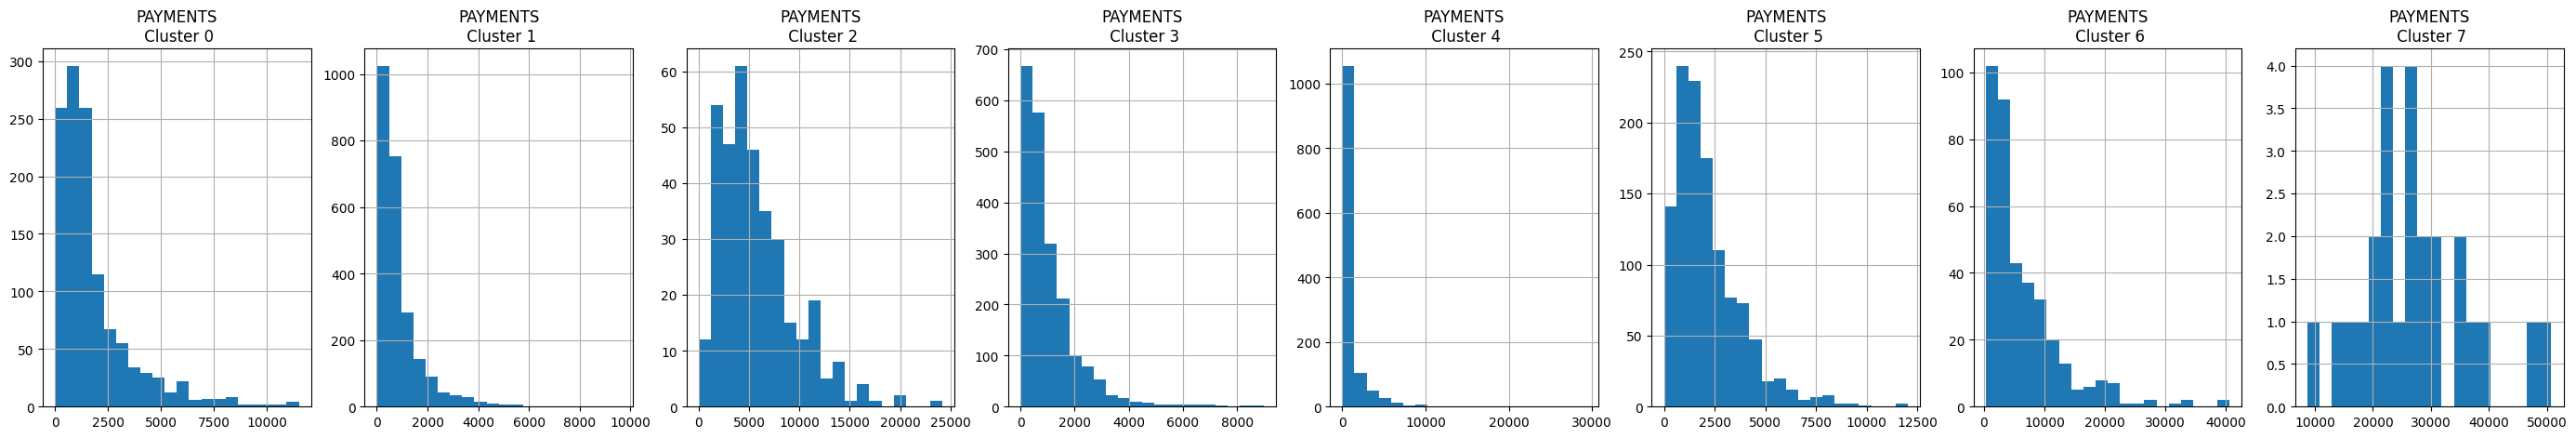

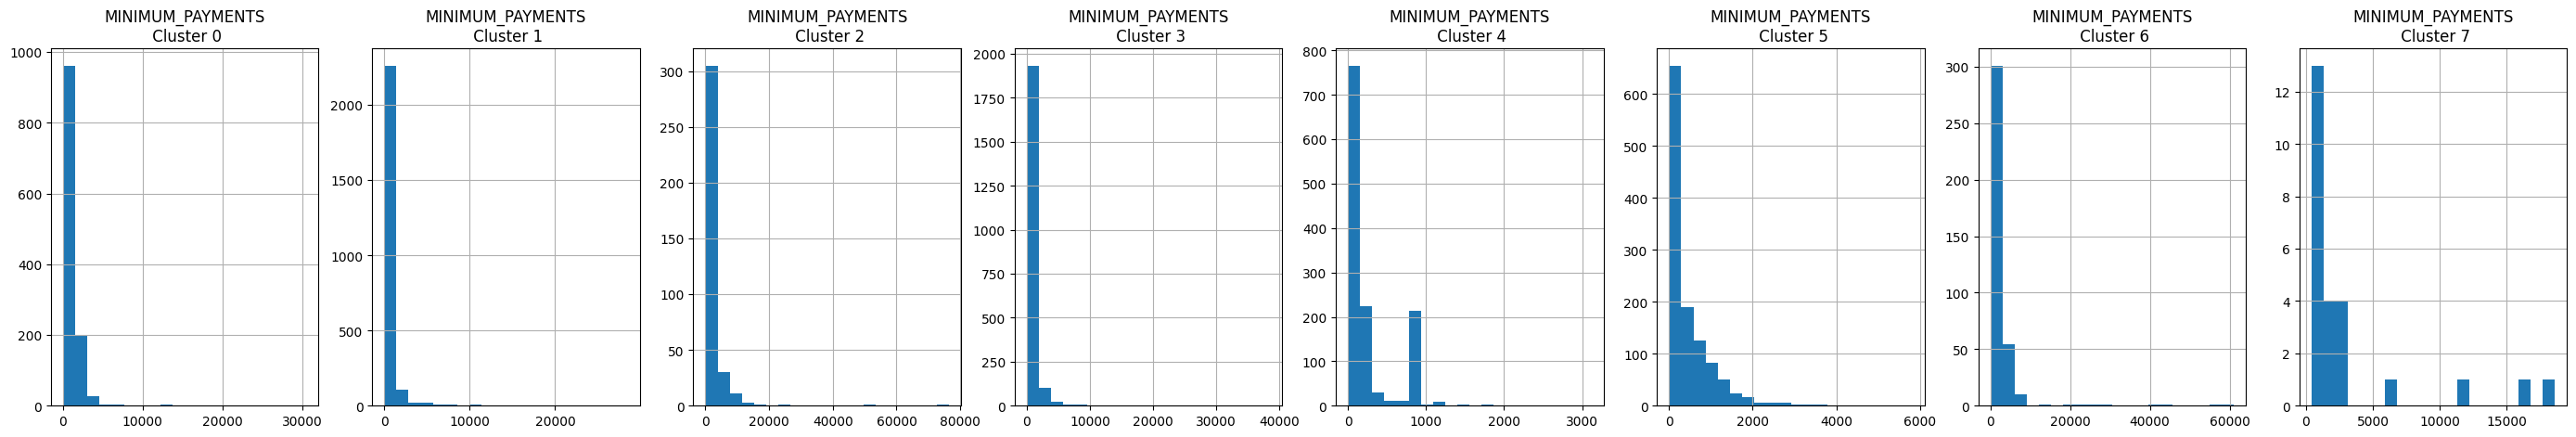

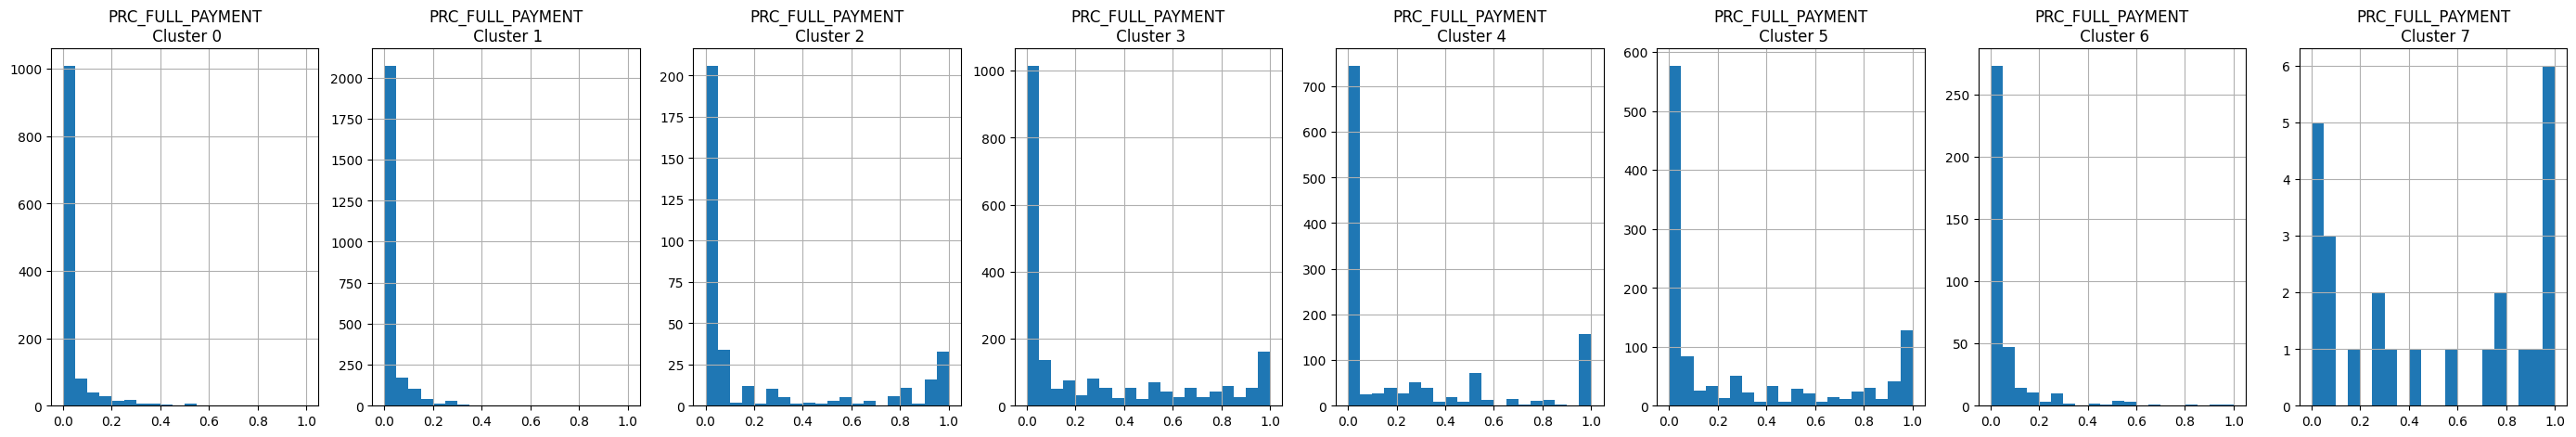

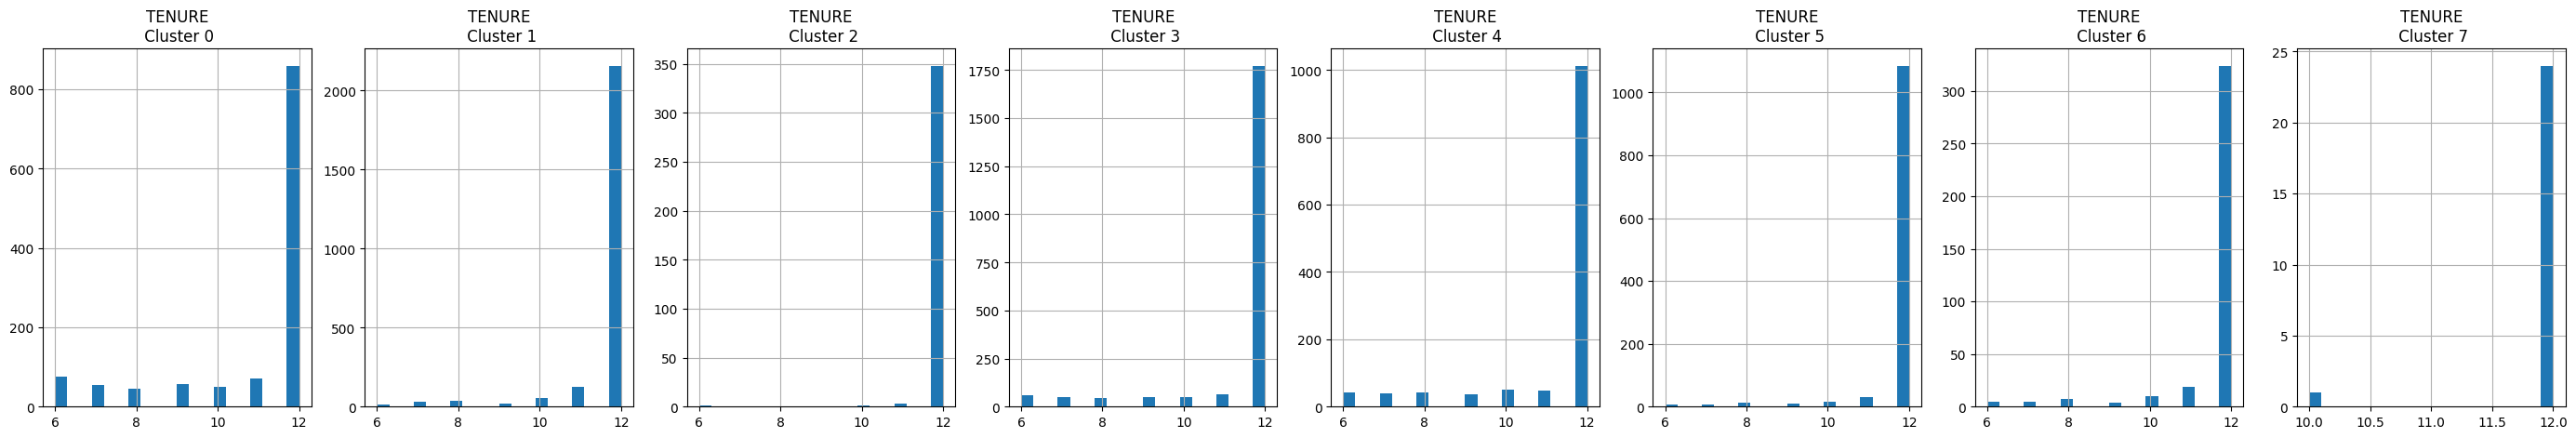

In [34]:
for i in df.columns :
    plt.figure(figsize = (35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins = 20)
        plt.title('{}\n Cluster {}'.format(i,j))
    plt.show()

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 
   LEVERAGING the POWER of PCA <br>
    Further, using pca we can perform dimetionality reduction and analyse how the  clusters are covering all the datapoints .  
    Using PCA , the dataset has been reduced to 2 dimensions which are 'pca1' and 'pca2'. 
    </p>
    

In [35]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221888, -1.07645244],
       [-1.13828484,  2.50647095],
       [ 0.9696863 , -0.38351164],
       ...,
       [-0.92620504, -1.81078462],
       [-2.33655676, -0.65796797],
       [-0.55642648, -0.40046372]])

In [36]:
pca_df = pd.DataFrame(data = principal_comp , columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076452
1,-1.138285,2.506471
2,0.969686,-0.383512
3,-0.873626,0.043160
4,-1.599433,-0.688580


In [37]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster' : labels})],axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076452,1
1,-1.138285,2.506471,0
2,0.969686,-0.383512,5
3,-0.873626,0.043160,1
4,-1.599433,-0.688580,1


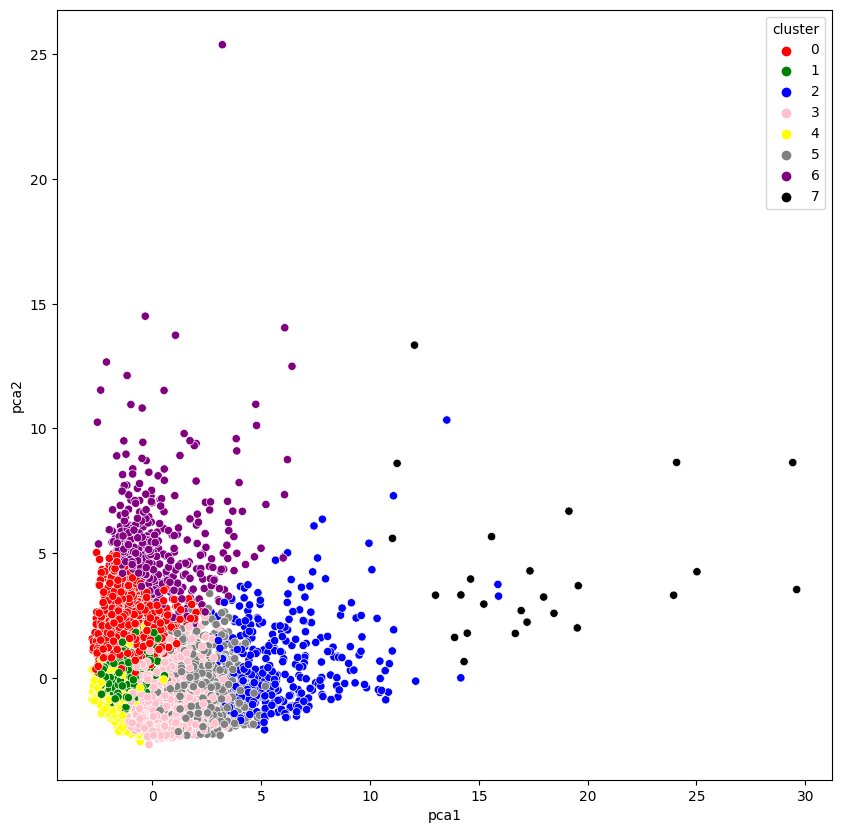

In [38]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1' , y = 'pca2' , hue = 'cluster' , data = pca_df,palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #DAAD86; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;"> 📊 'pca1' and 'pca2' help us see the dataset better. They help us notice that our 8 groups (clusters) cover all the data points. 🤓<br>
But, here's an insight: These groups are like friends who have some connections with each other. It's like a big party where everyone is  having fun,  clear lines between them cannot be drawn because they share common interests! 🎉🤝
    </p>

clus

In [39]:
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3074.342796,0.951356,243.911204,170.616059,73.323768,2758.768719,0.169887,0.087865,0.089362,0.424147,9.953833,3.403133,5314.307127,1796.903378,1217.641641,0.029655,10.969497
1,1307.261219,0.967335,276.780290,218.109465,58.872816,476.754403,0.172287,0.095920,0.076956,0.104998,1.832245,3.134286,3058.598639,864.832560,732.803122,0.021478,11.707347
2,3715.410675,0.988128,6323.317337,3632.165581,2692.851473,618.908474,0.956421,0.669912,0.866431,0.076461,2.042493,92.626062,9150.991501,5755.114893,2165.505880,0.227975,11.968839
3,754.407895,0.950495,888.324904,165.993007,722.902299,219.430672,0.897558,0.079369,0.846903,0.040816,0.769598,18.589388,3345.381637,1043.964592,757.646696,0.266279,11.476099
4,109.904118,0.366927,322.957708,198.374317,124.816358,321.477421,0.264543,0.072302,0.183062,0.037169,0.729984,4.087127,3715.921424,1076.129845,270.090300,0.228658,11.306122
5,1336.668023,0.971141,2161.498486,1692.566997,468.931488,305.890698,0.886804,0.759810,0.449632,0.054241,1.016253,30.297690,6154.344817,2146.649305,504.672547,0.279083,11.806672
6,6267.243873,0.973041,799.005241,468.414465,330.769786,7391.926508,0.398759,0.180075,0.295852,0.570192,21.403743,12.171123,9944.251337,6519.320521,2937.856257,0.052931,11.641711
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


<p style="font-size: 3 rem; color: #FFF8E4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2); letter-spacing: 2px; line-height: 1.2; margin: 0; padding: 20px; background-color: #5C4A72; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); font-family: 'baskerville', cursive;">
    <b> 📊 FINAL CONCLUSIONS 📊</b><br><br>
1)Customers can't be completely split into entirely different groups because each group shares something in common with the others. There's a lot of mingling going on! 🌐👥<br><br>
2)Now, diving into the clusters_centers dataframe, we can craft policies for the following clusters: <br><br>
a) 'LOW TENURE CLIENTS' (Cluster 6):<br>
This exclusive group has a tenure of 7 years, lower than the others. 🕰️<br><br>
b) 'LOW ACCOUNT BALANCE CLIENTS' (Cluster 3):<br>
Clients here have a comparatively lower account balance, with infrequent balance changes and minimal purchases. 💰📉<br><br>
c) 'CLIENTS WITH HIGH PURCHASES' (Cluster 4):<br>
These clients are VIPs, contributing significantly to the organization's profit with frequent and expensive purchases. 💳💼<br><br>
d) 'CLIENTS WHO DON'T PAY FULL CREDIT CARD BILLS' (Cluster 0):<br>
Low PRC_FULL_PAYMENT suggests that clients in this cluster prefer not to pay their credit card bills in one go. 🚫💳<br><br>
Keep the party going with these insights! 🎉🚀
    </p>